# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape



(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [4]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]

(97, 2)


Text(0, 0.5, 'Bénéfice x1000')

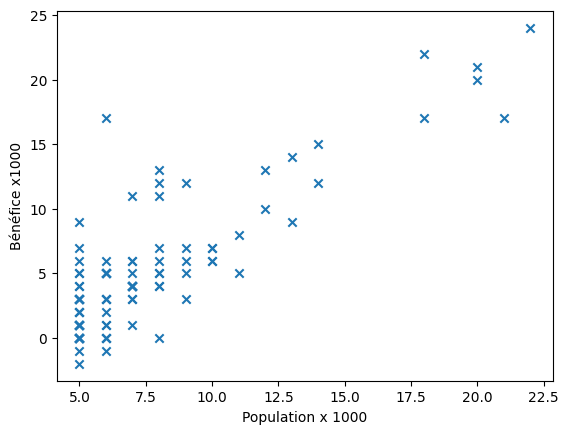

In [5]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte

    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    J=0
    for i in range(0, len(y)):
        h=0
        for j in range(0, len(theta)):
            h += theta[j]*X[i,j]
        J += ((h - y[i])**2)
    print(J)
    J = J/(2*len(y))
    return J

    

In [7]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement

    return np.sum((np.dot(X,theta).flatten() - y)**2) / (2*len(y))
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [8]:
def gradientDescentNonVect(X, y, theta, alpha, iterations):
    for i in range(iterations):
        for j in range(len(theta)):
            sumXjJteta = 0
            for k in range(len(y)):
                sumXjJteta += (np.dot(theta,X[k,:]).flatten() - y[k])*X[k,j]
            theta[j] = theta[j] - alpha * sumXjJteta/len(y)

    return theta


In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        theta = theta - alpha * (np.dot(X.T, np.dot(X,theta).flatten() - y)/len(y))

    return theta



# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [10]:

theta = np.zeros((2, ))

Calculer le cout initial

In [11]:
initialCost=computeCost(X, y, theta)
print(initialCost)

29.257731958762886


Appel des la fonction de calcul du gradient

In [12]:
# paramètres
iterations = 100000
alpha = 0.013
theta = np.zeros((2, ))
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[-3.80875807  1.19285652]


Non vect +3min lors de l'apprentissage
<br>
Vect quelque seconde


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

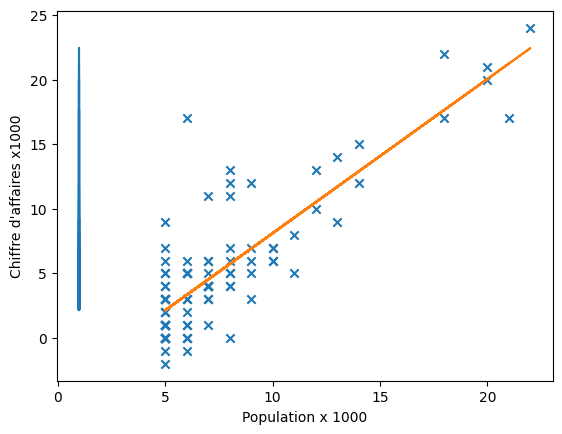

In [13]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

In [14]:
iterations = 1000
start = -5
end = 5
values = np.zeros((iterations,iterations))
X1 = np.linspace(start, end, iterations)


for i in range(iterations):
    for j in range(iterations):
        values[i,j] = computeCost(X, y, np.array([X1[i],X1[j]]))



4.270046265784272


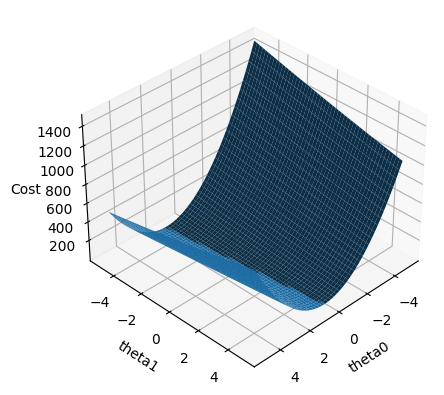

In [15]:

print(values.min())
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X2, Y2 = np.meshgrid(X1, X1)

# Plot the surface
ax.plot_surface(X2,Y2, values)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost');

ax.view_init(35, 45)

plt.show()

Prédire des valeurs de y

In [16]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

0.3662397451562813

In [17]:
predict2 = np.matmul([1, 7],theta)
predict2

4.541237563274592

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [18]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [19]:
# d'abord créer X et y
data = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)

intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
print (X.shape)
y = data[:, 1]
print(y.shape)




(47, 3)
(47,)


In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire


Mise à l'échelle des données

In [20]:

# Initialise the Scaler
scaler = StandardScaler()
# To scale data
scaler.fit(data)

ScaledData = scaler.transform(data)


intercept=np.ones((ScaledData.shape[0],1))

XScaled=np.column_stack((intercept,ScaledData[:,0:2]))
yScaled = ScaledData[:, 1]



Normalisation des données en moyenne = 0

Appliquer la descente du gradient à plusieurs variables

In [21]:
# paramètres
def CalculateTheta(X,y,itera,alpha):
    iterations = itera
    alpha = alpha
    theta = np.zeros((X.shape[1], ))
    # Appel
    theta = gradientDescent(X, y, theta, alpha, iterations)
    print(theta)
    print(computeCost(X, y, theta))

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [35]:
print("Not scaled :")
CalculateTheta(X,y,10,0.01)
print("Scaled :")
CalculateTheta(XScaled,yScaled,100000,0.0025)

Not scaled :
[-2.77489636e+40 -6.40899058e+43 -9.25670742e+40]
9.490127107942463e+93
Scaled :
[1.46233498e-18 1.80843596e-14 1.00000000e+00]
3.5812357528000232e-28


On peut apercevoir la difference entre les données calculé avec et sans normalisation des données donc on peut en déduire que la normalisation est nécessaire pour avoir des resultat cohérent et compréhensible


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [24]:

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

print(reg.coef_)
print(reg.intercept_)


1.0
[ 0.00000000e+00 -1.08420217e-18  1.00000000e+00]
2.220446049250313e-15


On remarque que les valeurs sont assez proche de celle qu'on a trouvé avec notre algorithme

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
#chercher les bonnes valeur de aalpha et d'iterations pour obtenir un bon résultat

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
#BELAISSAOUI mohamed Elmekki 191931063467
#ABDELHADI Nabih Samy 191931079994
# bonne chance